#Neste notebook, exploraremos uma amostra dos dados do enem do ano de 2019!

#Abaixo vamos importar algumas bibliotecas para começar a nossa análise!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Temos então uma visualizaçao dos nossos dados.

In [2]:
Dados = pd.read_csv('../input/amostra-dados-enem-2019/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
Dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


#Aqui temos a quantidade de linhas(127380) e de colunas(136) do nosso dataset, lembrando que é uma amostra e nao todos os dados!

In [3]:
Dados.shape

(127380, 136)

#Aqui temos a quantidade de participantes por estado de residencia.

In [4]:
Dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

#Abaixo temos as primeiras 5 idades que mais aparecem entre os candidatos, logo depois as 5 ultimas idades.

In [5]:
Dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

Text(0.5, 0, 'Idades')

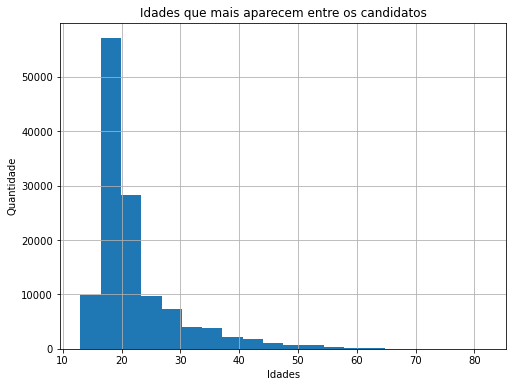

In [6]:
Dados["NU_IDADE"].hist(bins = 20, figsize = (8,6))
plt.title('Idades que mais aparecem entre os candidatos')
plt.ylabel('Quantidade')
plt.xlabel('Idades')


In [7]:
Proporcao = Dados['NU_IDADE'].value_counts()
Lista = []
for i in Proporcao:
  a = (i * 100) / 127379
  b = round(a,2)
  Lista.append(b)
Porcentagem = pd.DataFrame(Proporcao)
Porcentagem['Porcentagem'] = Lista
Porcentagem  

,NU_IDADE,Porcentagem
18,21452,16.84
17,21256,16.69
19,14418,11.32
20,10413,8.17
16,7830,6.15
...,...,...
75,2,0.00
73,2,0.00
82,1,0.00
77,1,0.00


In [8]:
Dados.query("NU_IDADE==13 or NU_IDADE==14")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
310,190001016485,2019,1501402,Belém,15,PA,14,F,1,1,...,A,A,A,B,B,A,C,A,A,A
2818,190001116721,2019,2202406,Capitão de Campos,22,PI,14,F,1,3,...,A,A,A,B,A,A,C,A,A,A
3022,190001124999,2019,2100303,Aldeias Altas,21,MA,14,M,1,3,...,B,A,A,B,B,A,D,A,B,B
5748,190001229936,2019,2908408,Conceição do Coité,29,BA,14,F,1,0,...,A,A,A,B,A,A,C,A,A,A
8845,190001353348,2019,2600104,Afogados da Ingazeira,26,PE,14,F,1,3,...,B,A,A,B,B,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123574,190005947160,2019,5004502,Itaporã,50,MS,14,M,1,1,...,A,A,B,B,B,B,E,A,E,B
124683,190005993245,2019,3538808,Piraju,35,SP,14,F,1,1,...,B,B,B,B,B,B,E,A,B,B
125999,190006045655,2019,5300108,Brasília,53,DF,14,F,1,3,...,B,A,A,E,B,B,E,B,B,B
127008,190006099362,2019,3109105,Bueno Brandão,31,MG,14,F,1,1,...,A,A,A,B,A,A,C,A,A,B


#Participantes com menos de 18 anos no enem por estado

In [9]:
total = len(Dados.query("NU_IDADE<18"))
Dados.query("NU_IDADE<18").SG_UF_RESIDENCIA.value_counts()/total*100

SP    23.434699
MG    10.070423
BA     6.379641
CE     6.251601
PE     5.777849
PR     5.646607
RJ     5.284891
PA     4.058899
GO     3.838028
MA     3.725992
RS     3.169014
PB     2.682458
SC     2.544814
PI     2.170294
MT     1.959027
ES     1.654930
DF     1.510883
AL     1.427657
RN     1.373239
AM     1.370038
MS     1.347631
SE     1.296415
TO     1.101152
RO     0.749040
AP     0.601793
AC     0.348912
RR     0.224072
Name: SG_UF_RESIDENCIA, dtype: float64

#Na series abaixo, temos a quantidade de treineiros por idade

#*Treineiros como são chamados, são os alunos que não concluiram a educação básica, mas querem sentir como é a prova

In [10]:
Dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

In [11]:
Dados.query("NU_IDADE==13 or NU_IDADE==14")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
310,190001016485,2019,1501402,Belém,15,PA,14,F,1,1,...,A,A,A,B,B,A,C,A,A,A
2818,190001116721,2019,2202406,Capitão de Campos,22,PI,14,F,1,3,...,A,A,A,B,A,A,C,A,A,A
3022,190001124999,2019,2100303,Aldeias Altas,21,MA,14,M,1,3,...,B,A,A,B,B,A,D,A,B,B
5748,190001229936,2019,2908408,Conceição do Coité,29,BA,14,F,1,0,...,A,A,A,B,A,A,C,A,A,A
8845,190001353348,2019,2600104,Afogados da Ingazeira,26,PE,14,F,1,3,...,B,A,A,B,B,A,D,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123574,190005947160,2019,5004502,Itaporã,50,MS,14,M,1,1,...,A,A,B,B,B,B,E,A,E,B
124683,190005993245,2019,3538808,Piraju,35,SP,14,F,1,1,...,B,B,B,B,B,B,E,A,B,B
125999,190006045655,2019,5300108,Brasília,53,DF,14,F,1,3,...,B,A,A,E,B,B,E,B,B,B
127008,190006099362,2019,3109105,Bueno Brandão,31,MG,14,F,1,1,...,A,A,A,B,A,A,C,A,A,B


In [12]:
N = pd.DataFrame(Dados.query('IN_TREINEIRO == 1')['NU_IDADE'])
S = pd.DataFrame(Dados.query('IN_TREINEIRO == 0')['NU_IDADE'])


Text(0, 0.5, 'Quantidade por idade')

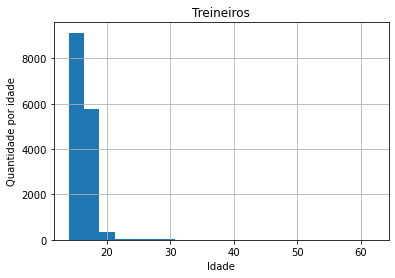

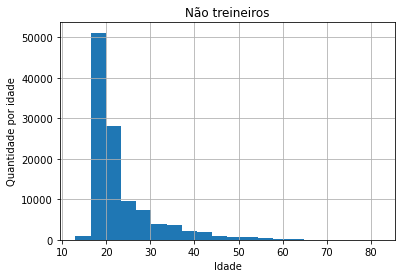

In [13]:
N.hist(bins = 20)
plt.title('Treineiros')
plt.xlabel('Idade')
plt.ylabel('Quantidade por idade')

S.hist(bins = 20)
plt.title('Não treineiros')
plt.xlabel('Idade')
plt.ylabel('Quantidade por idade')

#Abaixo temos a quantidade de alunos que tem ou não tem acesso a internet
#* A = não tem acesso
#* B = tem acesso

In [14]:
Dados['Q025'].value_counts()


B    98793
A    28587
Name: Q025, dtype: int64

Text(0.5, 1.0, 'Alunos com acesso a internet')

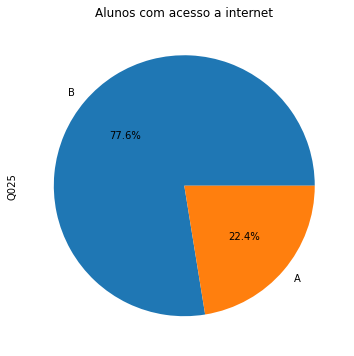

In [15]:
plt.figure(figsize=(10,6))
Dados['Q025'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.title('Alunos com acesso a internet')


#Abaixo veremos a média de notas das 5 avaliações

In [16]:
medias = [Dados['NU_NOTA_CH'].mean(),Dados['NU_NOTA_CN'].mean(),Dados['NU_NOTA_MT'].mean(),Dados['NU_NOTA_LC'].mean(),Dados['NU_NOTA_REDACAO'].mean()]
media = pd.DataFrame(medias, index = 'Ciencias_humanas Ciencias_natureza Matematica Linguagens_codigo Redação'.split())
media.round(0)


,0
Ciencias_humanas,507.0
Ciencias_natureza,478.0
Matematica,524.0
Linguagens_codigo,520.0
Redação,572.0


#Abaixo veremos uma analise dos alunos que optarem entre as linguagens: Inglês e espanhol

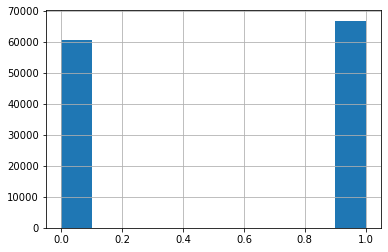

In [17]:
Dados['TP_LINGUA'].hist()

In [18]:
ingles = Dados.query('TP_LINGUA == 0')
espanhol = Dados.query('TP_LINGUA == 1')

Text(0.5, 1.0, 'Desempenho provas linguagens(ingles e espanhol)')

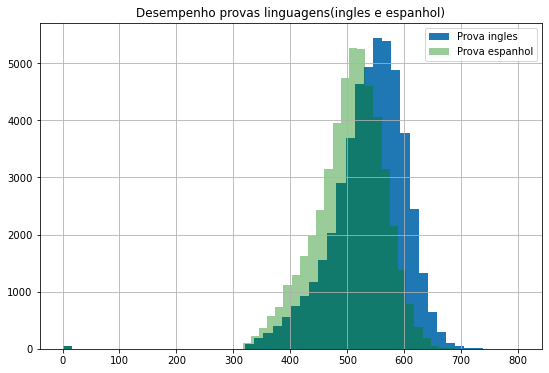

In [19]:
ingles['NU_NOTA_LC'].hist(bins=50, figsize=(9,6))
espanhol['NU_NOTA_LC'].hist(bins=50, alpha = 0.4,color = 'green', figsize=(9,6))
plt.legend(['Prova ingles', 'Prova espanhol'])
plt.title('Desempenho provas linguagens(ingles e espanhol)')


#Abaixo temos a relação entra a nota total e a raça dos participantes
# *0 = não declarado
# *1 = branco
# *2 = preta
# *3 = parda
# *4 = amarela
# *5 = indigena

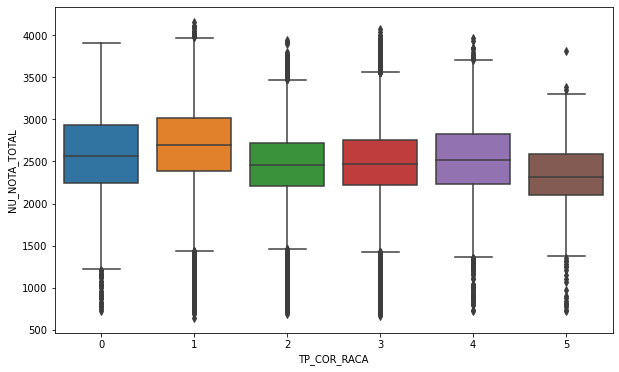

In [20]:
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT', 'NU_NOTA_REDACAO']
Dados["NU_NOTA_TOTAL"] = Dados[provas].sum(axis=1)
Dados[provas].describe()
dados_diferente_zero = Dados[Dados['NU_NOTA_TOTAL'] != 0]
dadoszero = dados_diferente_zero.query("NU_NOTA_LC != 0 & NU_NOTA_CH !=0 & NU_NOTA_CN != 0 & NU_NOTA_MT !=0")
dadoszero.dropna()
plt.figure(figsize=(10,6))
sns.boxplot(x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', data = dadoszero)


#Vamos ver alguns dados do municipio de Bagé

In [21]:
d = Dados[Dados['NO_MUNICIPIO_RESIDENCIA'] == 'Bagé']
d

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
17226,190001688280,2019,4301602,Bagé,43,RS,29,F,1,3,...,A,A,B,B,A,D,A,A,B,1474.5
17286,190001690682,2019,4301602,Bagé,43,RS,22,M,1,3,...,A,A,B,A,A,D,A,B,B,2664.6
17376,190001693993,2019,4301602,Bagé,43,RS,18,F,1,3,...,A,A,B,B,A,B,A,A,B,2406.3
17662,190001705028,2019,4301602,Bagé,43,RS,22,M,2,0,...,A,A,B,A,A,C,A,B,B,0.0
17738,190001708169,2019,4301602,Bagé,43,RS,35,F,1,2,...,A,A,A,A,A,B,A,A,A,2691.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123479,190005943040,2019,4301602,Bagé,43,RS,18,M,1,1,...,A,B,B,B,A,C,B,A,B,2302.4
123532,190005945146,2019,4301602,Bagé,43,RS,60,M,2,1,...,A,B,D,B,B,D,B,B,B,2771.8
123755,190005954667,2019,4301602,Bagé,43,RS,28,M,1,2,...,A,B,C,A,A,C,A,A,B,2769.2
123986,190005964437,2019,4301602,Bagé,43,RS,19,F,1,1,...,A,A,B,A,A,D,A,A,A,0.0


In [22]:
mediasb = [d['NU_NOTA_CH'].mean(),d['NU_NOTA_CN'].mean(),d['NU_NOTA_MT'].mean(),d['NU_NOTA_LC'].mean(),d['NU_NOTA_REDACAO'].mean()]
mediab = pd.DataFrame(mediasb, index = 'Ciencias_humanas Ciencias_natureza Matematica Linguagens_codigo Redação'.split())
mediab.round(0)

,0
Ciencias_humanas,515.0
Ciencias_natureza,477.0
Matematica,523.0
Linguagens_codigo,525.0
Redação,525.0


#Menores de 18 anos por estado

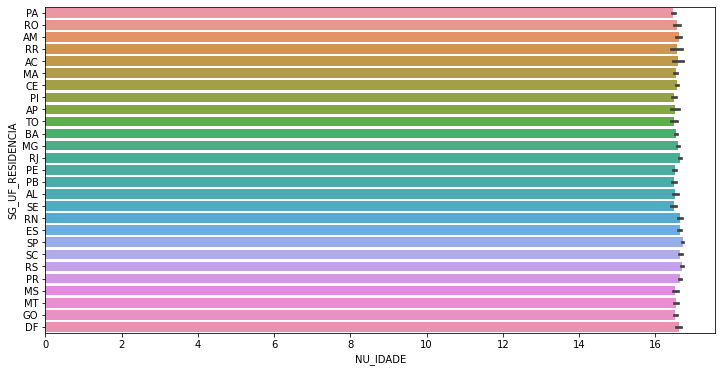

In [23]:
Menor18 = Dados[Dados['NU_IDADE'] < 18]
Menores = pd.DataFrame(Menor18[['NU_IDADE', 'SG_UF_RESIDENCIA']])
plt.figure(figsize=(12,6))
sns.barplot(x = 'NU_IDADE', y = 'SG_UF_RESIDENCIA', data = Menores)

In [24]:
renda_ordenada = Dados["Q006"].unique()
renda_ordenada.sort()

#Abaixo fizemos uma relação entre a renda dos alunos e a nota total, vemos aqui que a nota do aluno aumenta gradativamente conforme sua renda.

#A - nenhuma renda
#B - De  998 até  1.497
#C - De  1.497 até  1.996
#D - De  1.996 até  2.495
#E - De  2.495 até  2.994
#G - De  2.994 até  3.992
#H - De  3.992 até  4.990
#I - De  4.990 até  5.988
#J - De  5.988 até  6.986
#K - De  6.986 até  7.984
#L - De  7.984 até  8.982
#M - De  8.982 até  9.980
#N - De  9.980 até  11.976
#0 - De  11.976 até  14.970
#P - De  14.970 até  19.960
#Q - Mais de 19.960


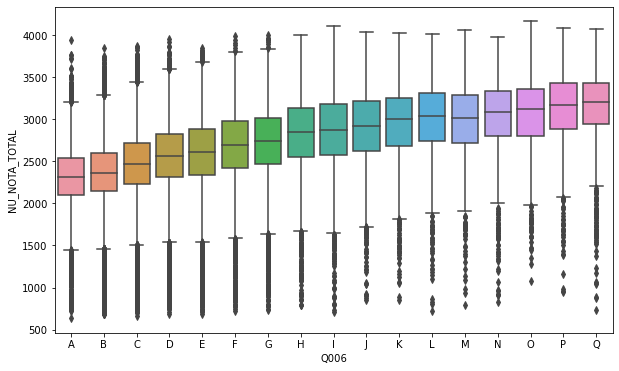

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dadoszero,order = renda_ordenada)

In [26]:
def boxplot(x,y ,data):
    sns.boxplot(x = x, y = y, data = data)

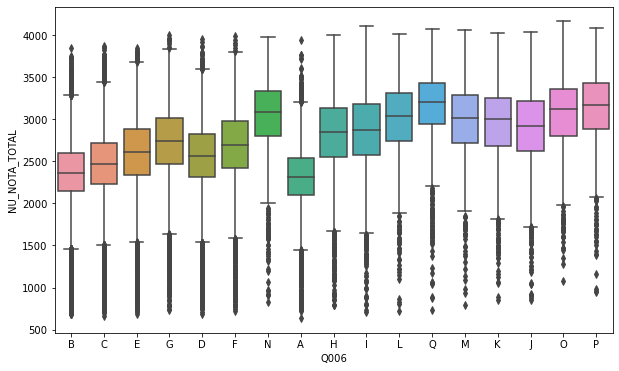

In [27]:
plt.figure(figsize=(10,6))
boxplot("Q006","NU_NOTA_TOTAL",dadoszero)

In [28]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']

In [29]:
zero = Dados[Dados['NU_NOTA_TOTAL'] == 0]

In [30]:
dados_status_zero = {
    i: zero[i].value_counts() for i in presenca
}
dados_status_zero = pd.DataFrame.from_dict(dados_status_zero)

In [31]:
dados_status_zero

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
0,29157.0,29001,29001,29157.0
1,5.0,41,41,5.0
2,NaN,120,120,NaN


# Relação da nota total com o tipo de escola do aluno no ensino médio
# *1 = não respondeu
# *2 = publica
# *3 = privada

Text(0.5, 1.0, 'Grafico das notas totais pela renda, com matiz no tipo de escola do ensino medio')

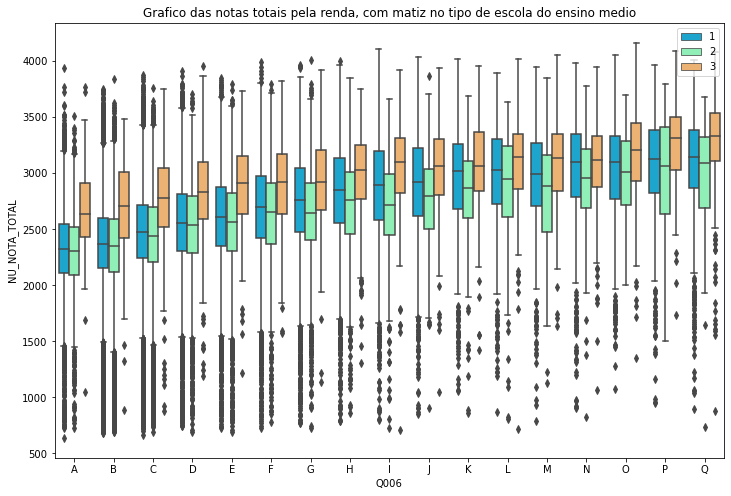

In [32]:
plt.figure(figsize=(12,8))
axes = sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL',hue = 'TP_ESCOLA',palette = 'rainbow', data = dadoszero, order = renda_ordenada)
axes.legend(loc = 1)
plt.title('Grafico das notas totais pela renda, com matiz no tipo de escola do ensino medio')




In [33]:
dados_status_zero.index.names = ['0: faltou  1: presente 2: eliminado' ]

#Alunos que zeraram a prova

In [34]:
dados_status_zero

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
0: faltou 1: presente 2: eliminado,,,,
0,29157.0,29001,29001,29157.0
1,5.0,41,41,5.0
2,NaN,120,120,NaN


In [35]:
eliminados = Dados.query("TP_PRESENCA_CN == 2 or TP_PRESENCA_CH == 2 or TP_PRESENCA_LC == 2 or TP_PRESENCA_MT == 2")
eliminados[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
77,NaN,NaN,NaN,NaN,NaN
396,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN
728,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
125216,NaN,NaN,NaN,NaN,NaN
125503,NaN,472.4,476.8,NaN,520.0
125784,NaN,NaN,NaN,NaN,NaN
126769,NaN,NaN,NaN,NaN,NaN


In [36]:
var = Dados[['Q006', 'IN_TREINEIRO']]
rt = pd.DataFrame(var)
rt

,Q006,IN_TREINEIRO
0,B,1
1,B,0
2,C,0
3,B,0
4,E,1
...,...,...
127375,G,0
127376,B,0
127377,B,0
127378,C,0


In [37]:
dados_diferente_zero

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,...,A,A,B,A,A,D,A,B,B,2867.4
127376,190006120036,2019,2902807,Barra da Estiva,29,BA,18,M,1,2,...,A,A,B,A,A,D,A,B,B,2218.5
127377,190006120037,2019,2927408,Salvador,29,BA,22,F,1,3,...,A,A,A,A,A,B,A,A,B,1453.9
127378,190006120060,2019,2930709,Simões Filho,29,BA,26,F,2,2,...,A,A,B,A,A,C,A,A,A,2573.9


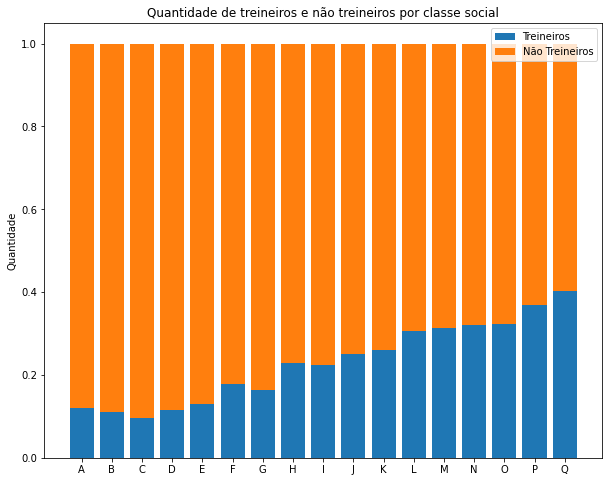

In [38]:
dados_geral_treineiros = dados_diferente_zero['Q006'].value_counts()
dados_treineiros = dados_diferente_zero.query('IN_TREINEIRO == 1')['Q006'].value_counts()/dados_geral_treineiros
dados_nao_treineiros = dados_diferente_zero.query('IN_TREINEIRO == 0')['Q006'].value_counts()/dados_geral_treineiros

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(renda_ordenada, dados_treineiros, label='Treineiros')
ax.bar(renda_ordenada, dados_nao_treineiros, bottom=dados_treineiros, label='Não Treineiros')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de treineiros e não treineiros por classe social')
ax.legend()

plt.show()

Text(0.5, 1.0, 'Boxplot das notas de total pelo acesso à internet')

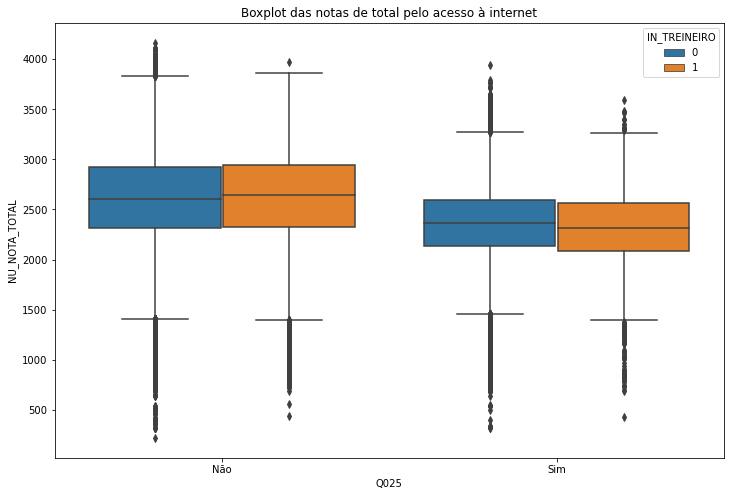

In [39]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL",hue = 'IN_TREINEIRO', data = dados_diferente_zero)
ax.set_xticklabels(['Não', 'Sim'])
plt.title("Boxplot das notas de total pelo acesso à internet")

#Abaixo fizemos uma relação entre as notas dos alunos, a escolaridade e a profissão dos pais, e podemos ver que a medida que a escolaridade e o nivel de profissão sobem, a nota tambem .

In [40]:
estudo_ordenado = Dados["Q001"].unique()
estudo_ordenado.sort()

Text(0.5, 1.0, 'Notas dos alunos baseado na escolaridade do pai')

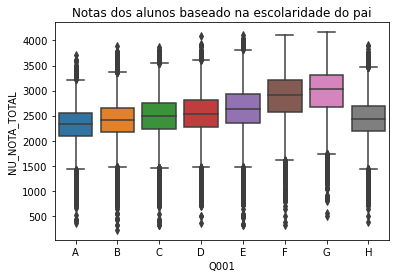

In [41]:
axes = sns.boxplot(x = 'Q001', y = 'NU_NOTA_TOTAL', data = dados_diferente_zero, order = estudo_ordenado)
plt.title("Notas dos alunos baseado na escolaridade do pai")

Text(0.5, 1.0, 'Notas dos alunos baseado na escolaridade do mãe')

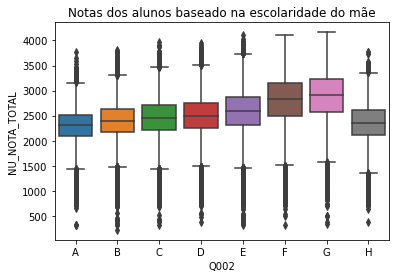

In [42]:
axes2 = sns.boxplot(x = 'Q002', y = 'NU_NOTA_TOTAL', data = dados_diferente_zero, order = estudo_ordenado)
plt.title("Notas dos alunos baseado na escolaridade do mãe")

In [43]:
internet_ordenado = dados_diferente_zero["Q003"].unique()
internet_ordenado.sort()
internet_ordenado2 = dados_diferente_zero["Q004"].unique()
internet_ordenado2.sort()


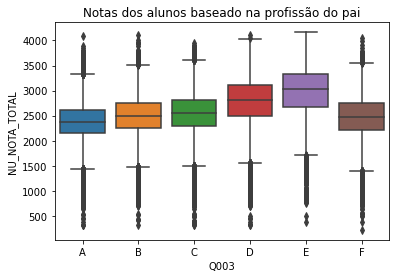

In [44]:
axes3 = sns.boxplot(x = 'Q003', y = 'NU_NOTA_TOTAL', data = dados_diferente_zero, order = internet_ordenado)
plt.title("Notas dos alunos baseado na profissão do pai")
import math
import matplotlib.gridspec as gridspec

Text(0.5, 1.0, 'Notas dos alunos baseado na profissão da mãe')

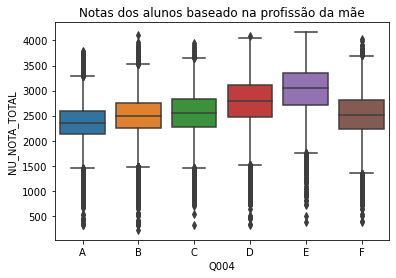

In [45]:
axes4 = sns.boxplot(x = 'Q004', y = 'NU_NOTA_TOTAL', data = dados_diferente_zero, order = internet_ordenado2)
plt.title("Notas dos alunos baseado na profissão da mãe")


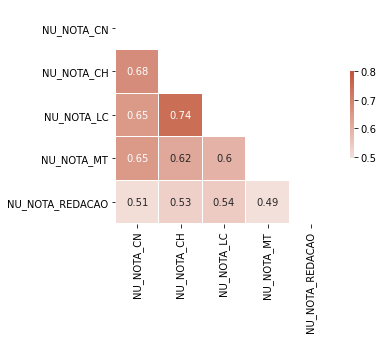

In [46]:


correlacao = dadoszero[provas].corr()
correlacao

mask = np.triu(np.ones_like(correlacao, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=correlacao, mask=mask, cmap=cmap, center= 0.45, vmax=0.8, square=True, linewidths=.1, cbar_kws={"shrink": 0.4}, annot=True)

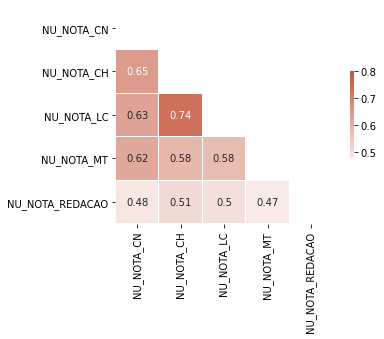

In [47]:
dadosRS = dadoszero.query("SG_UF_RESIDENCIA == 'RS'")
dadosRS.dropna()

correlacao = dadosRS[provas].corr()
correlacao

mask = np.triu(np.ones_like(correlacao, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=correlacao, mask=mask, cmap=cmap, center= 0.45, vmax=0.8, square=True, linewidths=.1, cbar_kws={"shrink": 0.4}, annot=True)

Text(0.5, 1.0, 'Correlação entre Matemática e Linguages')

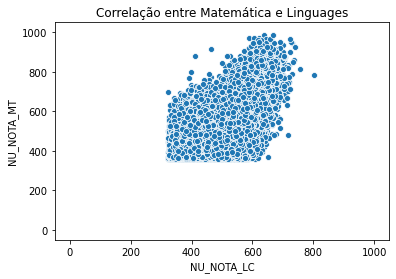

In [48]:
sns.scatterplot(data = dadoszero, x="NU_NOTA_LC", y="NU_NOTA_MT")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))
plt.title("Correlação entre Matemática e Linguages")

#Agora vamos utilizar machine learning para tentar prever a nota de matematica utilizando as demais notas

In [49]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_diferente_zero = dados_diferente_zero[provas].dropna()
x = dados_diferente_zero[provas_entrada]
y = dados_diferente_zero[prova_saida]

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
SEED = 1001

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state=SEED)

In [52]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(random_state=1001)

In [53]:
predicoes_matematica = modelo.predict(x_test)

In [54]:
y_test[:5]

29333     648.0
90595     504.3
105273    396.9
93076     471.3
116150    544.2
Name: NU_NOTA_MT, dtype: float64

(-50.0, 1050.0)

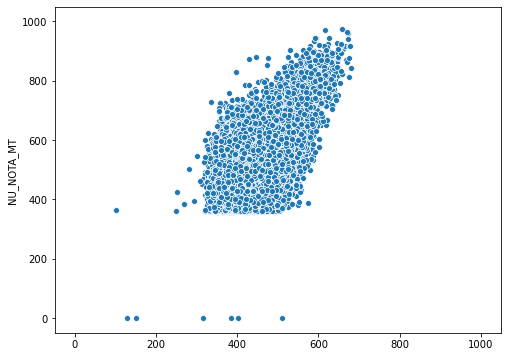

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicoes_matematica, y=y_test)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

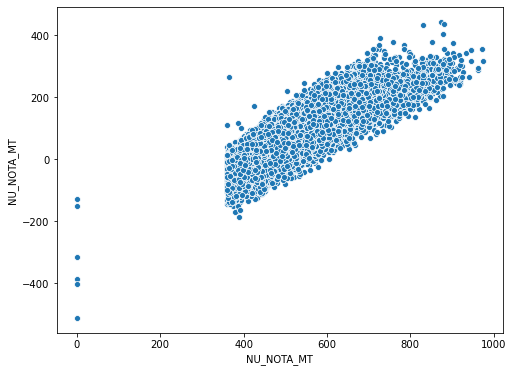

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test - predicoes_matematica)


In [57]:
resultados = pd.DataFrame()
resultados["Real"] = y_test
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

In [58]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
29333,648.0,544.701579,103.298421,10670.563823
90595,504.3,470.229487,34.070513,1160.799824
105273,396.9,350.046592,46.853408,2195.241881
93076,471.3,402.564780,68.735220,4724.530480
116150,544.2,407.304312,136.895688,18740.429474
...,...,...,...,...
43682,402.2,422.025226,-19.825226,393.039601
8449,399.9,395.611293,4.288707,18.393009
71180,535.1,457.924070,77.175930,5956.124190
65941,390.3,463.551978,-73.251978,5365.852309


In [59]:
resultados["quadrado_diferenca"].mean()

12355.698529282176

In [60]:
resultados["quadrado_diferenca"].mean()**(1/2)

111.15618979293134

In [61]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_train, y_train)
dummy_predicoes = modelo_dummy.predict(x_test)

In [62]:
from sklearn.metrics import *

mean_squared_error(y_test, dummy_predicoes)

11893.177400318851

In [63]:
mean_squared_error(y_test, predicoes_matematica)

12355.698529282177

In [64]:
from sklearn.linear_model import LinearRegression
modelo_lr = LinearRegression()
modelo_lr.fit(x_train, y_train)
predicao_lr = modelo_lr.predict(x_test)

resultados_lr = pd.DataFrame()
resultados_lr["Real"] = y_test
resultados_lr["Previsao"] = predicao_lr
resultados_lr["diferenca"] = resultados_lr["Real"] - resultados_lr["Previsao"]
resultados_lr["quadrado_diferenca"] = (resultados_lr["Real"] - resultados_lr["Previsao"])**2
resultados_lr

,Real,Previsao,diferenca,quadrado_diferenca
29333,648.0,614.067131,33.932869,1151.439618
90595,504.3,541.429601,-37.129601,1378.607235
105273,396.9,422.288336,-25.388336,644.567609
93076,471.3,488.971476,-17.671476,312.281079
116150,544.2,492.176811,52.023189,2706.412179
...,...,...,...,...
43682,402.2,467.677978,-65.477978,4287.365609
8449,399.9,462.181554,-62.281554,3878.991971
71180,535.1,507.275878,27.824122,774.181782
65941,390.3,528.771702,-138.471702,19174.412356


In [65]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)
x_sgd_train = scaler.transform(x_train)
x_sgd_test = scaler.transform(x_test)

n_iter=100
modelo_sgd = SGDRegressor(max_iter=n_iter)
modelo_sgd.fit(x_sgd_train, y_train)
predicao_sgd = modelo_sgd.predict(x_sgd_test)

resultados_sgd = pd.DataFrame()
resultados_sgd["Real"] = y_test
resultados_sgd["Previsao"] = predicao_sgd
resultados_sgd["diferenca"] = resultados_sgd["Real"] - resultados_sgd["Previsao"]
resultados_sgd["quadrado_diferenca"] = (resultados_sgd["Real"] - resultados_sgd["Previsao"])**2
resultados_sgd

,Real,Previsao,diferenca,quadrado_diferenca
29333,648.0,614.321887,33.678113,1134.215264
90595,504.3,540.623947,-36.323947,1319.429120
105273,396.9,419.090429,-22.190429,492.415121
93076,471.3,488.223759,-16.923759,286.413634
116150,544.2,491.134991,53.065009,2815.895169
...,...,...,...,...
43682,402.2,463.970603,-61.770603,3815.607387
8449,399.9,459.998882,-60.098882,3611.875646
71180,535.1,504.218993,30.881007,953.636621
65941,390.3,526.807537,-136.507537,18634.307790


In [66]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = SEED) 
regressor.fit(x_train, y_train)
predicao_rf = regressor.predict(x_test) 

resultados_rf = pd.DataFrame()
resultados_rf["Real"] = y_test
resultados_rf["Previsao"] = predicao_rf
resultados_rf["diferenca"] = resultados_rf["Real"] - resultados_rf["Previsao"]
resultados_rf["quadrado_diferenca"] = (resultados_rf["Real"] - resultados_rf["Previsao"])**2
resultados_rf

,Real,Previsao,diferenca,quadrado_diferenca
29333,648.0,620.778,27.222,741.037284
90595,504.3,470.605,33.695,1135.353025
105273,396.9,432.502,-35.602,1267.502404
93076,471.3,532.304,-61.004,3721.488016
116150,544.2,471.324,72.876,5310.911376
...,...,...,...,...
43682,402.2,455.620,-53.420,2853.696400
8449,399.9,461.664,-61.764,3814.791696
71180,535.1,462.729,72.371,5237.561641
65941,390.3,495.632,-105.332,11094.830224


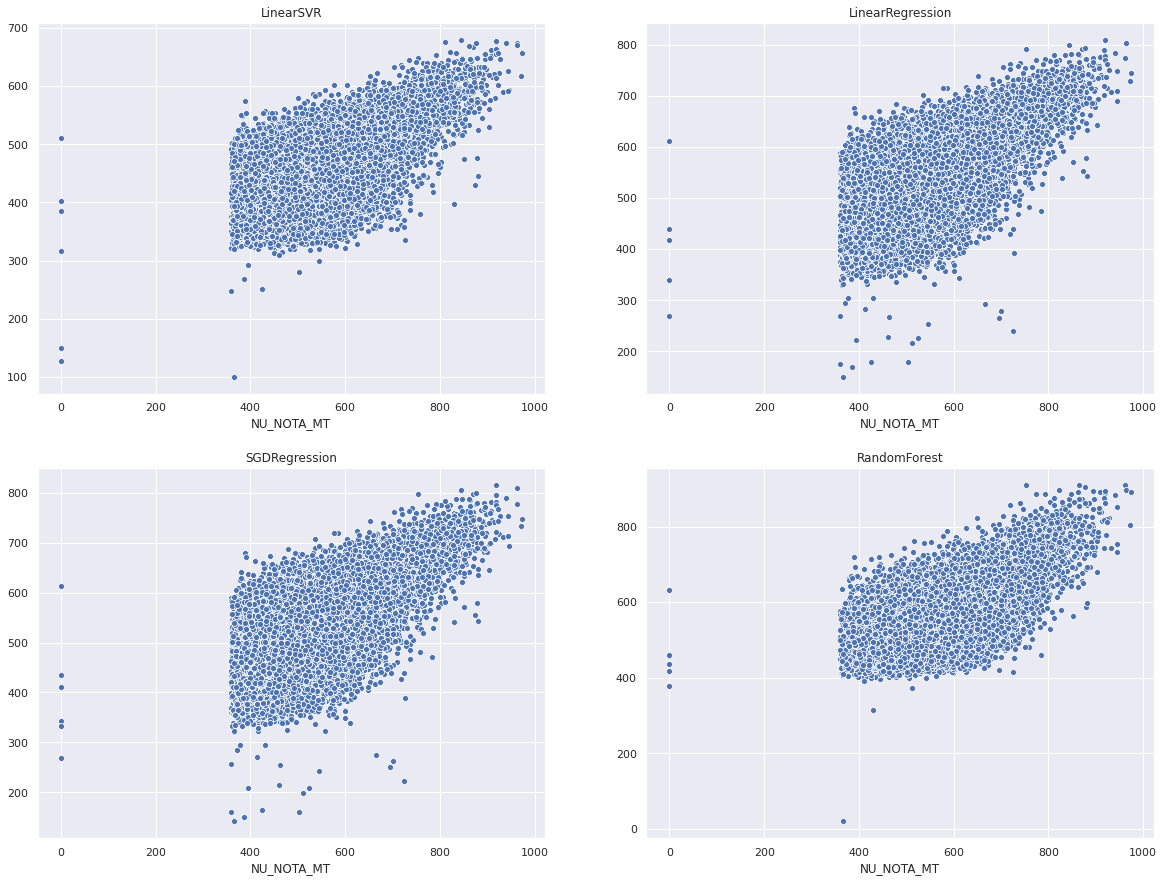

In [67]:
sns.set()
fig, axes = plt.subplots(2,2, figsize=(20, 15)) 
axes[0,0].set_title("LinearSVR")
axes[0,1].set_title("LinearRegression")
axes[1,0].set_title("SGDRegression")
axes[1,1].set_title("RandomForest")

sns.scatterplot(x=y_test, y=predicoes_matematica, ax=axes[0,0])
sns.scatterplot(x=y_test, y=predicao_lr, ax=axes[0,1])
sns.scatterplot(x=y_test, y=predicao_sgd, ax=axes[1,0])
sns.scatterplot(x=y_test, y=predicao_rf, ax=axes[1,1])

plt.show()